In [266]:
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline
from sklearn import linear_model
import seaborn as sns

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [320]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [321]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

C:\Users\JYOTIM\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


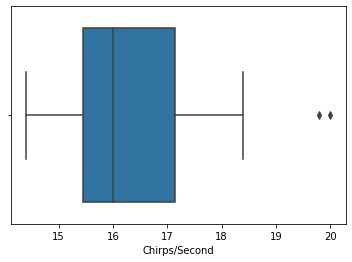

In [322]:
plt.figure(figsize=(6,4))
sns.boxplot(df['Chirps/Second'])
plt.show()
#2 outliers will not affect analysis so not removing it.

In [323]:
df.rename(columns = {'Chirps/Second':'Chirps'}, inplace = True)
print(df)
#df.drop(['transformed'], axis=1)
iqr = df.Chirps.quantile(0.75) - df.Chirps.quantile(0.25)
upper_threshold = df.Chirps.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps.quantile(0.25) - (1.5 * iqr)
lower_threshold
upper_threshold

    Chirps  Ground Temperature
0     20.0                88.6
1     16.0                71.6
2     19.8                93.3
3     18.4                84.3
4     17.1                80.6
5     15.5                75.2
6     14.7                69.7
7     15.7                71.6
8     15.4                69.4
9     16.3                83.3
10    15.0                79.6
11    17.2                82.6
12    16.0                80.6
13    17.0                83.5
14    14.4                76.3


19.699999999999996

In [324]:
df.isnull().sum()
#df = df.drop_duplicates() no need to drop duplicates. No duplicates
df.shape
df.dtypes

Chirps                float64
Ground Temperature    float64
dtype: object

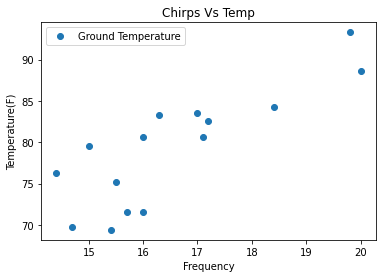

In [325]:
df.plot(x='Chirps', y='Ground Temperature', style='o')
plt.title('Chirps Vs Temp')
plt.xlabel('Frequency')
plt.ylabel('Temperature(F)')
plt.show()
#linear trend can be seen

In [326]:
df.corr()
#Strong Correlation which means there is linear relationship between frequency and tempearture and its positive relationship.

,Chirps,Ground Temperature
Chirps,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [327]:
X = df.loc[:, ['Chirps']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Ground Temperature'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=6)

In [328]:
y_test

array([82.6, 83.5, 69.7])

In [329]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [330]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [331]:
print(regressor.intercept_) # c

26.384400938289374


In [332]:
print(regressor.coef_) # slope - m

# predicted score  = 3.1953 * (Chrips/Second) + 26.384400938

[3.1953266]


In [333]:
regressor.predict([[15]])

array([74.31429989])

In [334]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([81.3440184 , 80.70495309, 73.35570191])

In [335]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,82.6,81.344018
1,83.5,80.704953
2,69.7,73.355702


In [336]:
regressor.predict([[18]]) # perils of extrapolation

array([83.90027968])

In [337]:
regressor.predict([[21.4738]])

array([95.00020521])

In [339]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8091433191110395


### Solution

1. Find the linear regression equation for this data.
   
       Linear qe Fit=3.1953 * (Chrips/Second) + 26.384400938
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
 
      R2-Score= 0.8091433191110395
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

      At 95 temp chirping rate will be 21.4738 per second
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

     chirps=18 per second temp= 83.90027968

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Assignment7

In [123]:
from typing import Any
import pandas as pd
  
# Read a text file to a dataframe using colon delimiters
df = pd.read_fwf('brain_body.txt')
  
# display DataFrame
print(df)
 

      Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]


In [124]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [125]:
print(df.shape)

(62, 2)


In [126]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
upper_threshold

119.60625

In [127]:
df = df[(df["Brain"] < 200)]

In [130]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr)
upper_threshold
df = df[(df["Body"] < 200)]

In [131]:
df.isnull().sum()
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
4,36.330,119.5
5,27.660,115.0


In [132]:
df = df.drop_duplicates()
df.shape

(51, 2)

In [133]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [134]:

import matplotlib.pyplot as plt


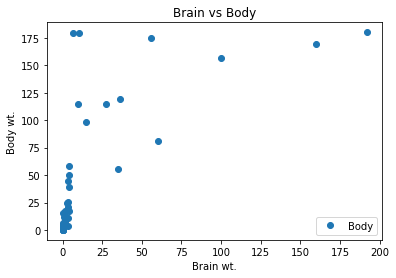

In [135]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain wt.')
plt.ylabel('Body wt.')
plt.show()

In [136]:
df.corr()

,Brain,Body
Brain,1.000000,0.701612
Body,0.701612,1.000000


In [137]:
df.Brain.values

array([3.385e+00, 4.800e-01, 1.350e+00, 3.633e+01, 2.766e+01, 1.483e+01,
       1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01, 1.000e+00,
       5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00, 2.300e-02,
       7.850e-01, 1.000e+01, 3.300e+00, 2.000e-01, 1.410e+00, 7.500e-01,
       3.500e+00, 6.800e+00, 3.500e+01, 4.050e+00, 1.200e-01, 2.300e-02,
       1.000e-02, 1.400e+00, 2.500e+00, 5.550e+01, 1.000e+02, 1.055e+01,
       5.500e-01, 6.000e+01, 3.600e+00, 4.288e+00, 2.800e-01, 7.500e-02,
       1.220e-01, 4.800e-02, 1.920e+02, 3.000e+00, 1.600e+02, 9.000e-01,
       1.620e+00, 1.040e-01, 4.235e+00])

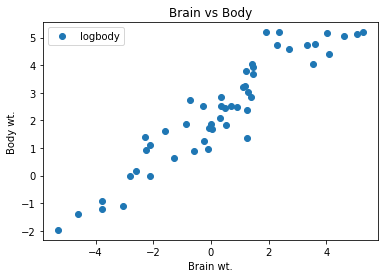

,logbrain,logbody
logbrain,1.000000,0.936858
logbody,0.936858,1.000000


In [138]:
import numpy as np
df['logbrain'] = np.log(df['Brain'])
df['logbody'] = np.log(df['Body'])
df.plot(x='logbrain', y='logbody', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain wt.')
plt.ylabel('Body wt.')
plt.show()
df[['logbrain','logbody']].corr()

In [139]:
df.head()

,Brain,Body,logbrain,logbody
0,3.385,44.5,1.219354,3.795489
1,0.480,15.5,-0.733969,2.740840
2,1.350,8.1,0.300105,2.091864
4,36.330,119.5,3.592644,4.783316
5,27.660,115.0,3.319987,4.744932


In [140]:
X = df[['logbrain']].values #array of features
y = df['logbody'].values #array of targets

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=80)

In [142]:
y_test

array([ 3.21887582,  4.39444915,  5.16478597, -0.91629073,  4.02535169,
        0.87546874])

In [143]:
X_train.shape, X_test.shape

((45, 1), (6, 1))

In [144]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [145]:
print(regressor.intercept_) # c

2.146076742293501


In [146]:
print(regressor.coef_) # slope - m

# log(Body wt.)  = 0.75154215 * (log(Brain wt.)) +2.0859374017282

[0.74682433]


In [147]:
regressor.predict([[0]])

array([2.14607674])

In [148]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([ 2.96654713,  5.20383288,  5.1456093 , -0.6711396 ,  4.80129718,
        1.69959752])

In [149]:
import math
df = pd.DataFrame({'Actual':np.exp( y_test), 'Predicted': np.exp(y_pred)})
df

,Actual,Predicted
0,25.0,19.424733
1,81.0,181.968370
2,175.0,171.676056
3,0.4,0.511126
4,56.0,121.668141
5,2.4,5.471745


In [150]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9245944837223687


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [281]:
df_sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df_sd.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [282]:
df_sd.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [283]:
df_sd.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [284]:
df_sd.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [285]:
df_sd.shape

(52, 6)

In [286]:
df_sd.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

In [287]:
df_sd.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


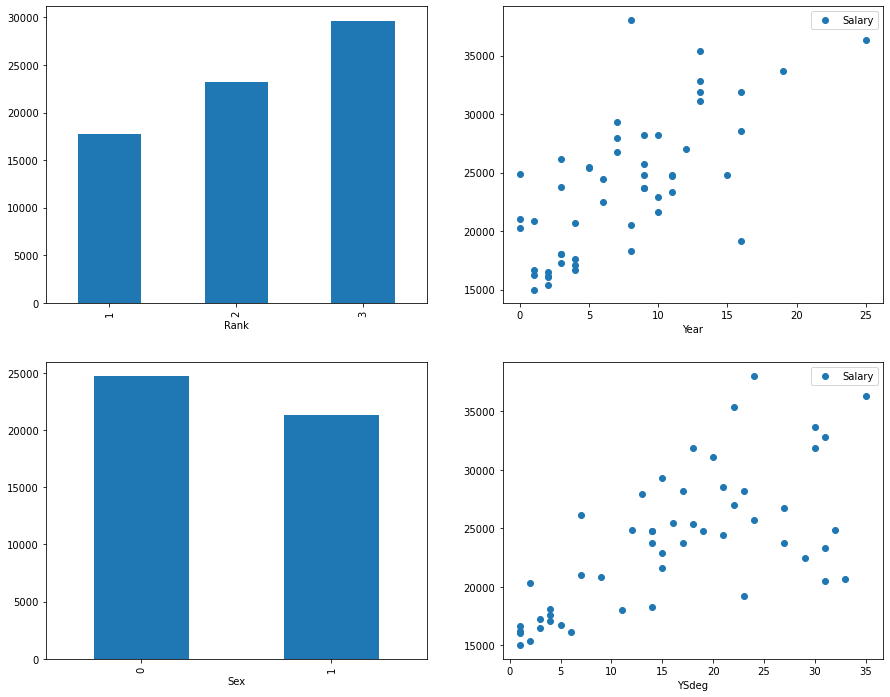

In [288]:
#df.groupby('Sex')['Salary'].mean().plot(kind='bar')
fig, axarr = plt.subplots(2, 2, figsize=(15, 12))
df_sd.groupby('Rank')['Salary'].mean().plot(kind='bar',ax=axarr[0][0])
df_sd.plot(x='Year', y='Salary',style='o',ax=axarr[0][1])
df_sd.groupby('Sex')['Salary'].mean().plot(kind='bar',ax=axarr[1][0])
#df.plot(x='YSdeg', y='Salary',style='o',ax=axarr[1][0])
df_sd.plot(x='YSdeg', y='Salary',style='o',ax=axarr[1][1])

plt.show()

In [289]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [290]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [292]:
lin_reg_eq_print(salary_discrim_cols, df_sd)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255601


In [294]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [295]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df_sd)))

R^2 score for equation using all columns: 0.8547180674410969


In [296]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [297]:
combos = get_combos(salary_discrim_cols)

In [298]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [300]:
combo_scores = all_combo_scores(combos, df_sd)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262853, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987165, ('Sex', 'Rank', 'Year')),
 (0.8437395200874138, ('Rank', 'Year', 'Degree')),
 (0.8436480933264598, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443395, ('Sex', 'Rank')),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180406, ('Sex', 'Year', 'YSdeg')),
 (0.5782019226431887, (

In [301]:
num_by_sex = df_sd.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


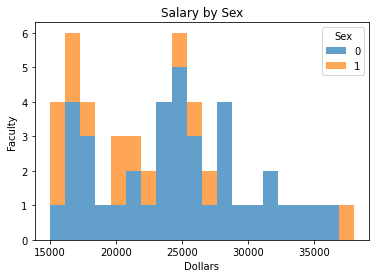

In [302]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

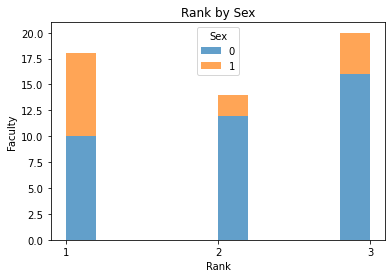

In [303]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

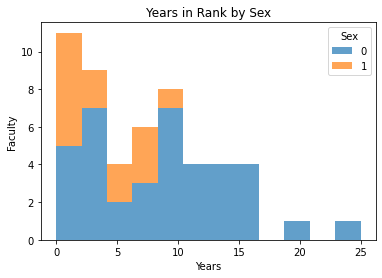

In [304]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [305]:
df_sd_10 = df_sd[df_sd['Year'] <= 10]

In [306]:
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_sd_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660303, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138204, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080975, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.726786695995319, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954576, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482033, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year',

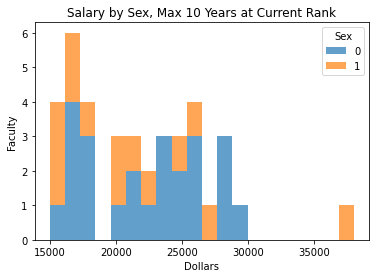

In [307]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

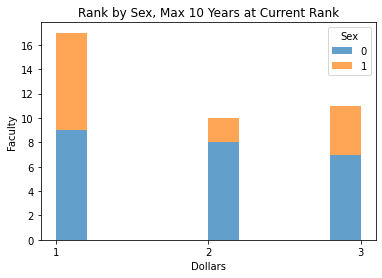

In [315]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [316]:
# The selection with the best 𝑅2

# score is: Sex, Rank, Year, Degree, YSdeg: 0.85471806744109691 (as seen above)

# However, although including all of the columns produces the highest 𝑅2
# score, there are two dominant factors: Year and Rank. Just these two factors taken together have a score of 0.84364809332645985.

In [ ]:
# It is worth noting that Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.